# Deutsch-Jozsa Algorithm

In [18]:
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute
from qiskit import BasicAer
from qiskit.tools.visualization import plot_histogram
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor

IBMQ.load_accounts()
backend = IBMQ.get_backend('ibmq_qasm_simulator', hub=None)
shots = 1024           # Number of shots to run the program (experiment); maximum is 8192 shots.
max_credits = 3        # Maximum number of credits to spend on executions. 

/Users/shesha/anaconda3/envs/Qiskitenv/lib/python3.6/site-packages/qiskit/providers/ibmq/ibmqprovider.py:251: UserWarning: Credentials are already in use.
  warnings.warn('Credentials are already in use.')


In [19]:
def DJ_N3(qc):
    qc.h(q[0])
    qc.h(q[1])
    qc.h(q[2])
    qc.h(q[2])
    qc.z(q[0])
    qc.cx(q[1], q[2])
    qc.h(q[2])
    qc.h(q[0])
    qc.h(q[1])
    qc.h(q[2])
    qc.measure(q,c)
    
def DJ_N3_Const(qc):
    qc.h(q[0])
    qc.h(q[1])
    qc.h(q[2])
    #qc.x(q[0])
    #qc.x(q[1])
    #qc.x(q[2])
    qc.h(q[0])
    qc.h(q[1])
    qc.h(q[2])

In [23]:
# Create a Quantum Register with 3 qubits.
q = QuantumRegister(3, 'q')
c = ClassicalRegister(3,'c')
# Create a Quantum Circuit acting on the q register
qc = QuantumCircuit(q,c)
DJ_N3_Const(qc)
qc.draw()

In [24]:
job_hpc = execute(qc, backend=backend, shots=shots, max_credits=max_credits)
result_hpc = job_hpc.result()

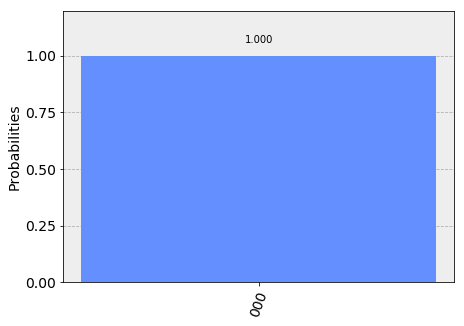

In [25]:
counts_hpc = result_hpc.get_counts(qc)
plot_histogram(counts_hpc)